In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_samples, silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

import statsmodels.api as sm
from pylab import rcParams

In [3]:
df = pd.read_csv('Data.csv')

In [4]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [5]:
df.tail()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,1,60,25.0,NaN,18,0,A,6,30,25093
24999,WH_124999,EID_74999,Rural,Mid,West,Zone 4,8,2,4,5664,...,1,239,39.0,2019.0,4,0,B+,2,11,5058


In [6]:
print("Numbers of rows in dataset are:", df.shape[0],", Numbers of column in dataset are:", df.shape[1]) 

Numbers of rows in dataset are: 25000 , Numbers of column in dataset are: 24


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [8]:
# Removing non contributing variables from our dataset

df.drop(["Ware_house_ID","WH_Manager_ID"] , axis=1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,25000.0,4.089040,2.606612,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,25000.0,0.773680,1.199449,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,3.104200,1.141663,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,4985.711560,1052.825252,1821.0,4313.0,4859.0,5500.0,11008.0
distributor_num,25000.0,42.418120,16.064329,15.0,29.0,42.0,56.0,70.0
flood_impacted,25000.0,0.098160,0.297537,0.0,0.0,0.0,0.0,1.0
flood_proof,25000.0,0.054640,0.227281,0.0,0.0,0.0,0.0,1.0
electric_supply,25000.0,0.656880,0.474761,0.0,0.0,1.0,1.0,1.0
dist_from_hub,25000.0,163.537320,62.718609,55.0,109.0,164.0,218.0,271.0
workers_num,24010.0,28.944398,7.872534,10.0,24.0,28.0,33.0,98.0


In [11]:
# Univariate Analysis for continous variables

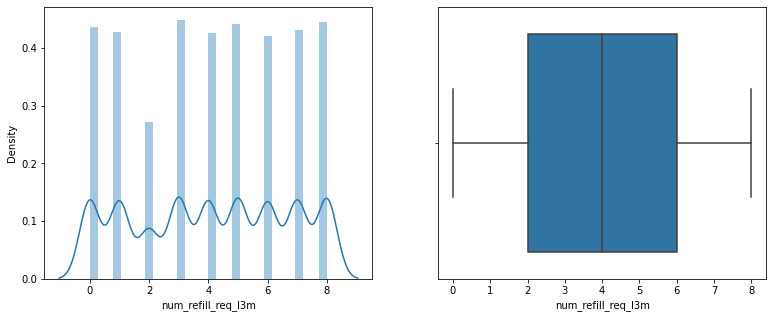

In [12]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['num_refill_req_l3m'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['num_refill_req_l3m'])
plt.show()

In [13]:
# 1)  skewness refers to the shape of the curve to check for normal distribution

# 2)  Kurtosis refers to the sharpness of the curve 

# Scale of skewness:

# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
# If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
# If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.


# Scale of kurtosis:

# Mesokurtic:  This is the normal distribution, value close to 3.
# Leptokurtic: This distribution has fatter tails and a sharper peak. The kurtosis is “positive” with a value greater than 3.
# Platykurtic: The distribution has a lower and wider peak and thinner tails. The kurtosis is “negative” with a value less than 3.

df['num_refill_req_l3m'].skew(), df['num_refill_req_l3m'].kurt()

(-0.07521670250797441, -1.2206971691575512)

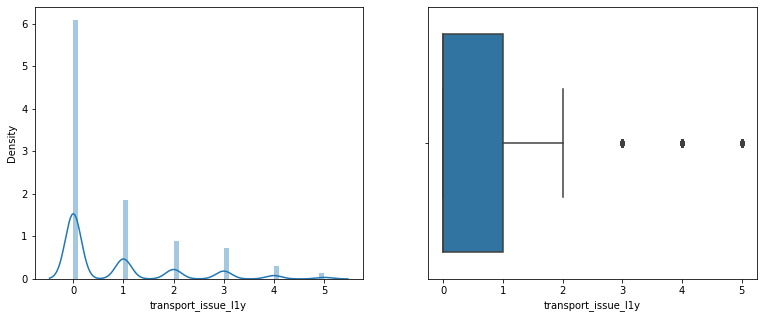

In [14]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['transport_issue_l1y'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['transport_issue_l1y'])
plt.show()

In [15]:
df['transport_issue_l1y'].skew(), df['transport_issue_l1y'].kurt()

(1.6109066411380673, 1.8384391021834907)

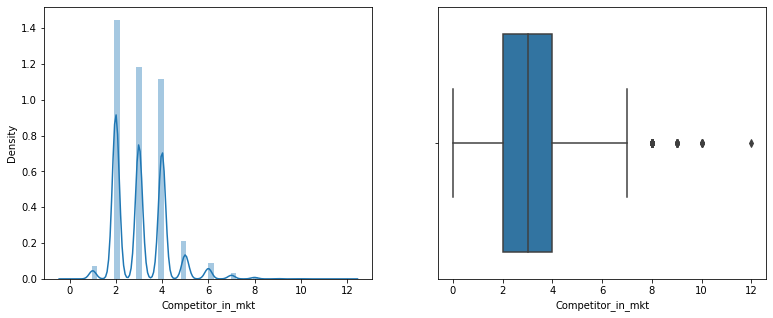

In [16]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['Competitor_in_mkt'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['Competitor_in_mkt'])
plt.show()

In [17]:
df['Competitor_in_mkt'].skew(), df['Competitor_in_mkt'].kurt()

(0.978455650054846, 1.7863684179828367)

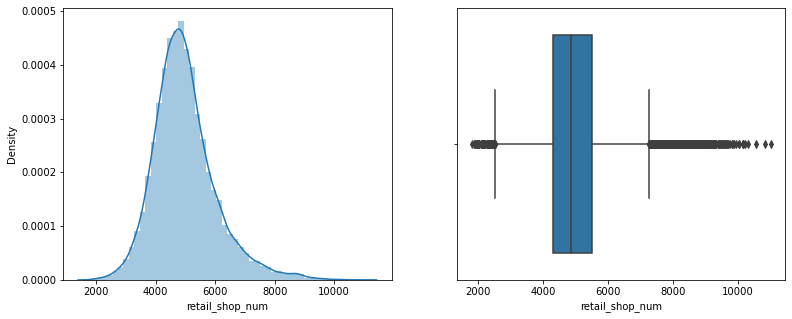

In [18]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['retail_shop_num'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['retail_shop_num'])
plt.show()

In [19]:
df['retail_shop_num'].skew(), df['retail_shop_num'].kurt()

(0.9083017428943478, 1.8519460354204917)

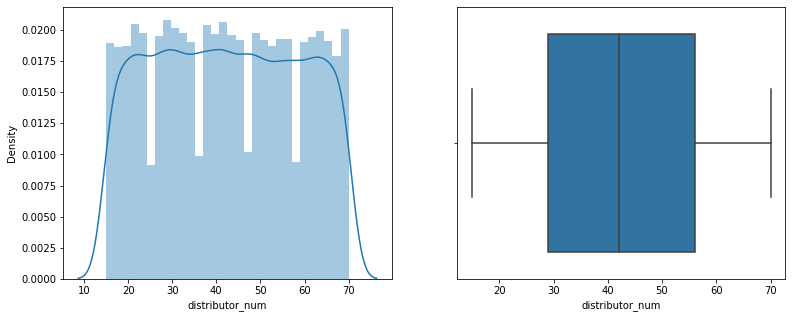

In [20]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['distributor_num'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['distributor_num'])
plt.show()

In [21]:
df['distributor_num'].skew(), df['distributor_num'].kurt()

(0.015212661848773332, -1.187563552587588)

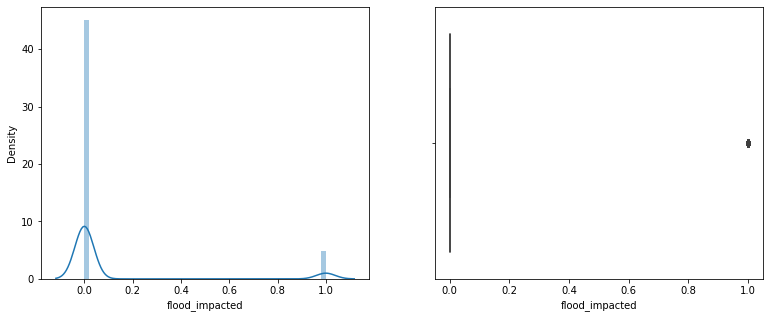

In [22]:
 plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['flood_impacted'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['flood_impacted'])
plt.show()

In [23]:
df['flood_impacted'].skew(), df['flood_impacted'].kurt()

(2.701327239008368, 5.29759265322193)

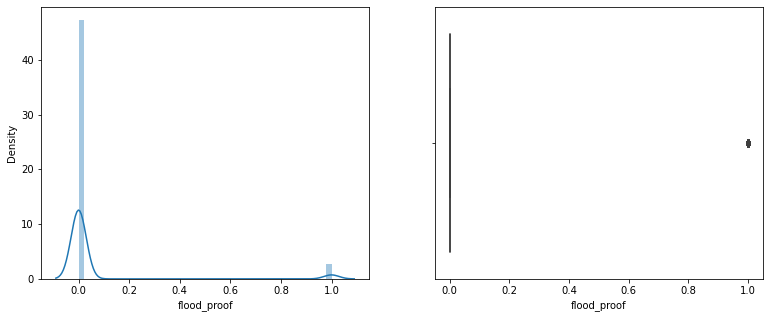

In [24]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['flood_proof'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['flood_proof'])
plt.show()

In [25]:
df['flood_proof'].skew(), df['flood_proof'].kurt()

(3.91934330658649, 13.362320934162229)

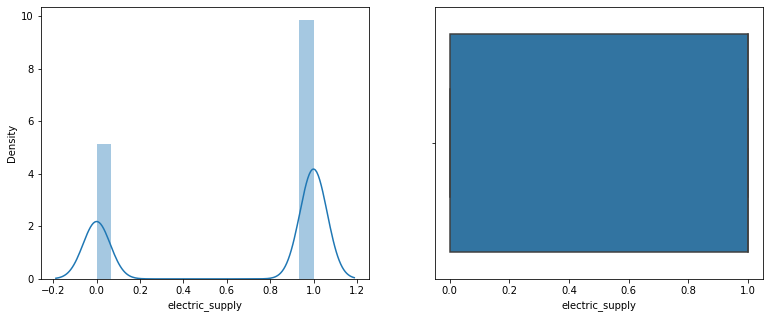

In [26]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['electric_supply'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['electric_supply'])
plt.show()

In [27]:
df['electric_supply'].skew(), df['electric_supply'].kurt()

(-0.6609332473772701, -1.5632923122969766)

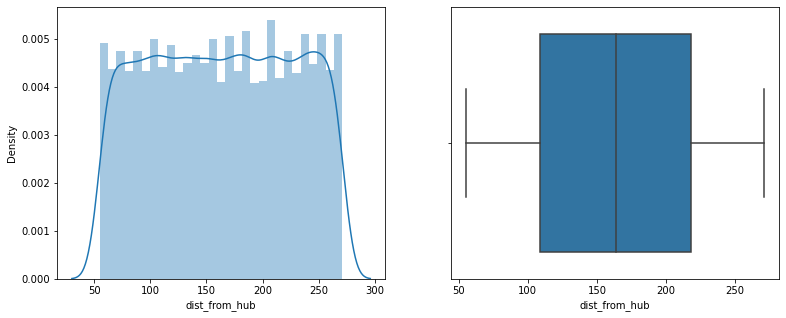

In [28]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['dist_from_hub'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['dist_from_hub'])
plt.show()

In [29]:
df['dist_from_hub'].skew(), df['dist_from_hub'].kurt()

(-0.005998690978273177, -1.200682315875814)

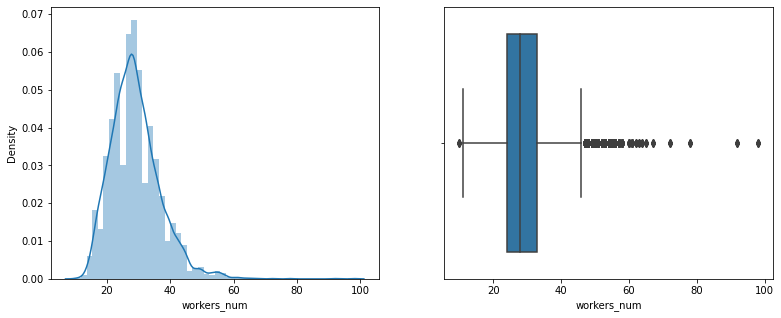

In [30]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['workers_num'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['workers_num'])
plt.show()

In [31]:
df['workers_num'].skew(), df['workers_num'].kurt()

(1.0599106472502862, 3.40933517915037)

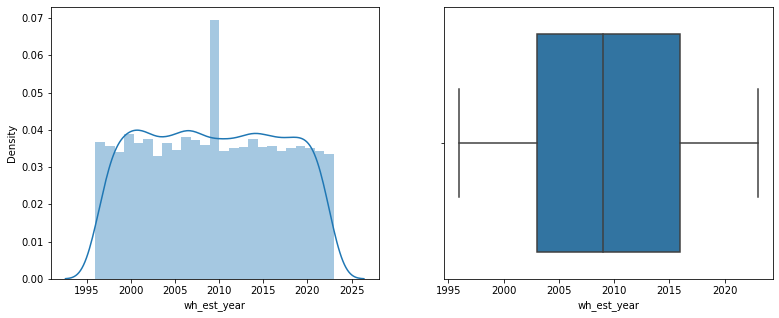

In [32]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['wh_est_year'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['wh_est_year'])
plt.show()

In [33]:
df['wh_est_year'].skew(), df['wh_est_year'].kurt()

(0.012416975085299788, -1.1758879697112232)

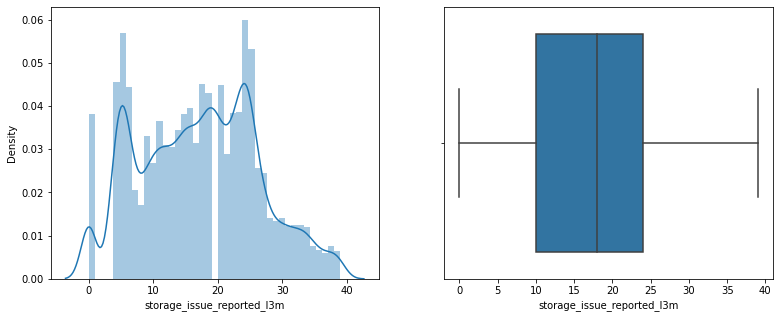

In [34]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['storage_issue_reported_l3m'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['storage_issue_reported_l3m'])
plt.show()

In [35]:
df['storage_issue_reported_l3m'].skew(), df['storage_issue_reported_l3m'].kurt()

(0.11334520852738339, -0.6801423016628303)

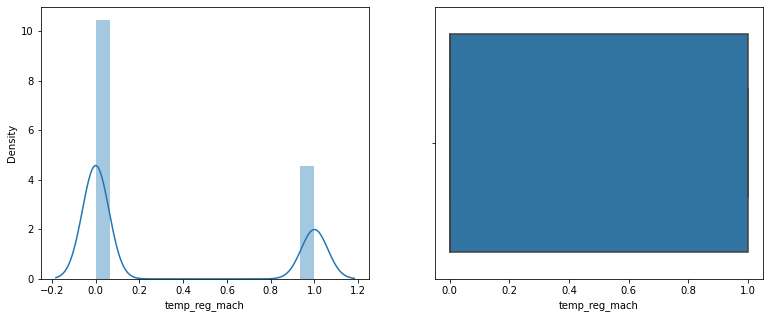

In [36]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['temp_reg_mach'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['temp_reg_mach'])
plt.show()

In [37]:
df['temp_reg_mach'].skew(), df['temp_reg_mach'].kurt()

(0.8559601492588518, -1.2674336239712622)

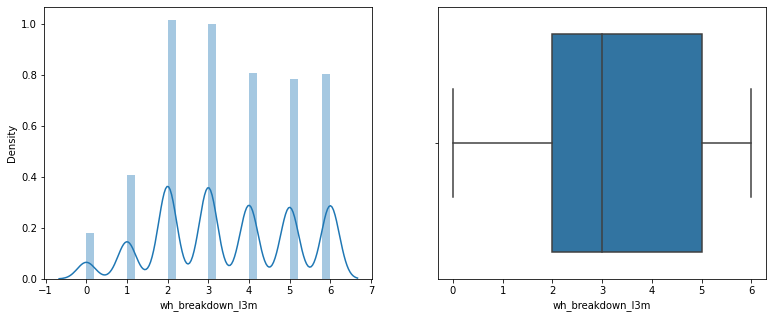

In [38]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['wh_breakdown_l3m'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['wh_breakdown_l3m'])
plt.show()

In [39]:
df['wh_breakdown_l3m'].skew(), df['wh_breakdown_l3m'].kurt()

(-0.06802567969809045, -0.9521487834836697)

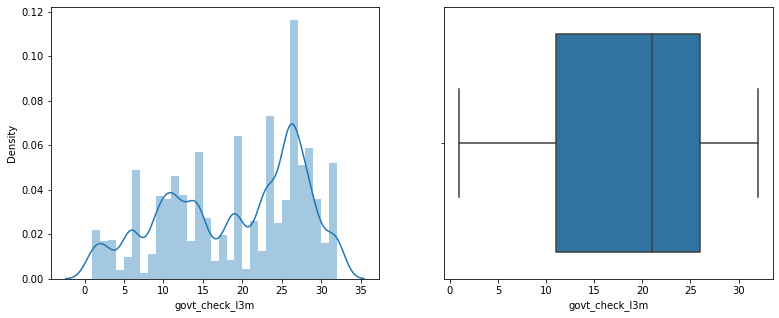

In [40]:
plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['govt_check_l3m'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['govt_check_l3m'])
plt.show()

In [41]:
df['govt_check_l3m'].skew(), df['govt_check_l3m'].kurt()

(-0.3632615312279769, -1.0573419461980733)

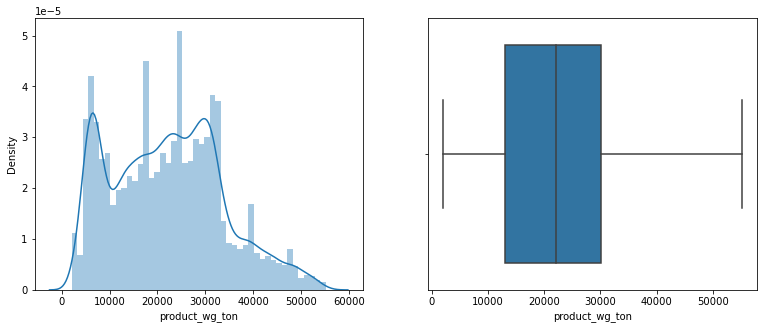

In [42]:
# Target Column

plt.figure(figsize = (20,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['product_wg_ton'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['product_wg_ton'])
plt.show()

In [43]:
df['product_wg_ton'].skew(), df['product_wg_ton'].kurt()

(0.33163104430999646, -0.5020221997549963)

In [44]:
### Let's examine the target column 

df.describe(include="all")["product_wg_ton"]

count     25000.000000
unique             NaN
top                NaN
freq               NaN
mean      22102.632920
std       11607.755077
min        2065.000000
25%       13059.000000
50%       22101.000000
75%       30103.000000
max       55151.000000
Name: product_wg_ton, dtype: float64

In [141]:
# Checking Log transformation of some of the variables
# distributor_num
# dist_from_hub
# workers_num
# govt_check_l3m

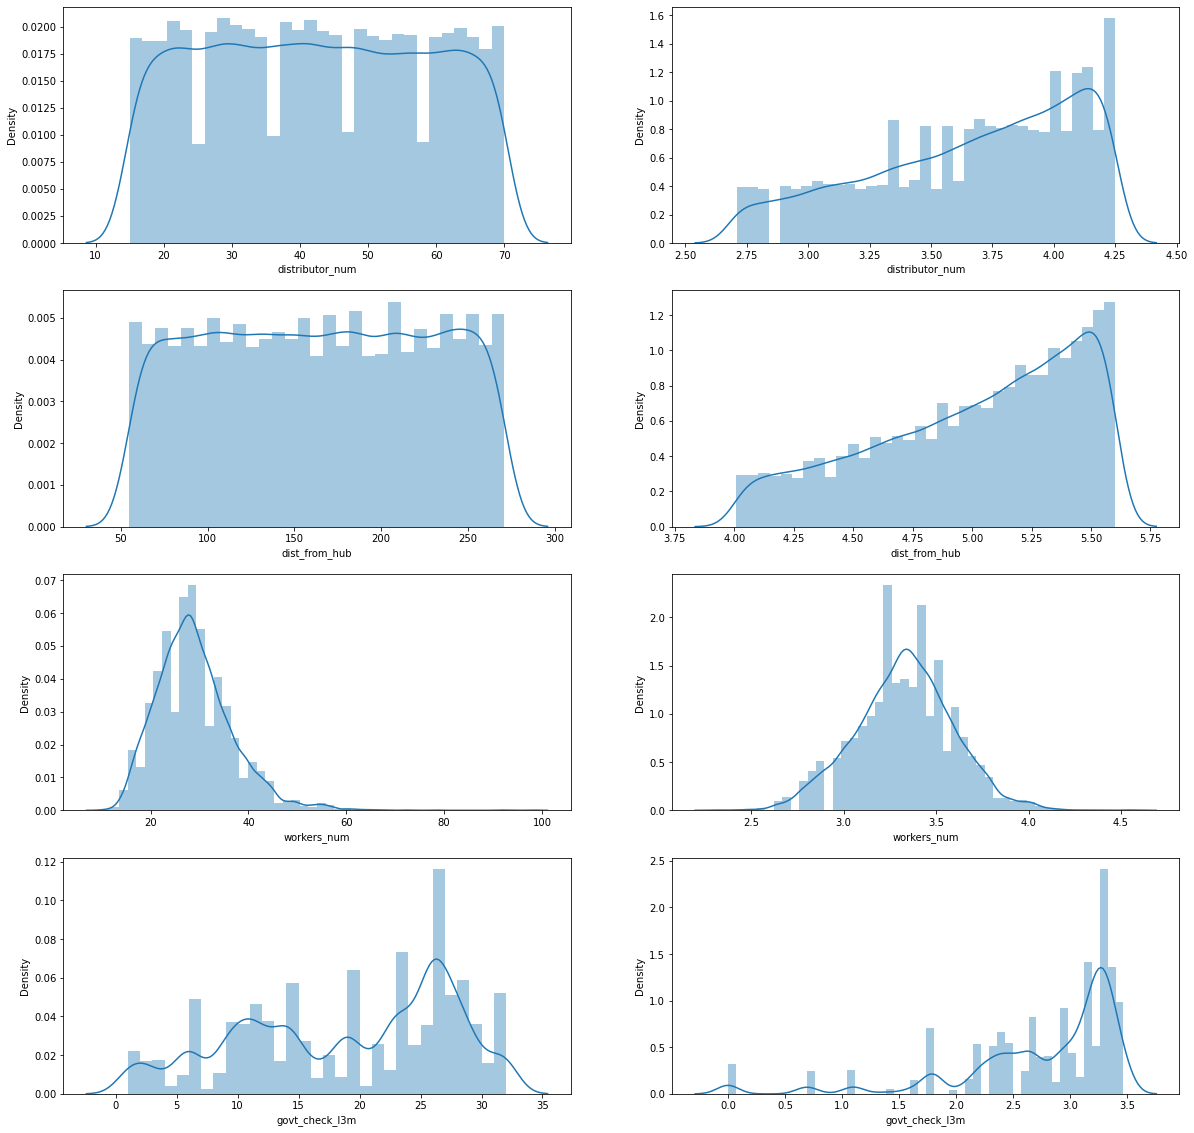

In [149]:
plt.figure(figsize = (20,20))

# distribution plot
plt.subplot(4,2,1) # subplot
sns.distplot(df['distributor_num'])
# distribution plot after log transformation
plt.subplot(4,2,2)
sns.distplot(np.log(df['distributor_num']))
# distribution plot
plt.subplot(4,2,3) # subplot
sns.distplot(df['dist_from_hub'])
# distribution plot after log transformation
plt.subplot(4,2,4)
sns.distplot(np.log(df['dist_from_hub']))
# distribution plot
plt.subplot(4,2,5) # subplot
sns.distplot(df['workers_num'])
# distribution plot after log transformation
plt.subplot(4,2,6)
sns.distplot(np.log(df['workers_num']))
# distribution plot
plt.subplot(4,2,7) # subplot
sns.distplot(df['govt_check_l3m'])
# distribution plot after log transformation
plt.subplot(4,2,8)
sns.distplot(np.log(df['govt_check_l3m']))

plt.show()

In [45]:
# Univariate Analysis for categorical variables

Rural    0.91828
Urban    0.08172
Name: Location_type, dtype: float64

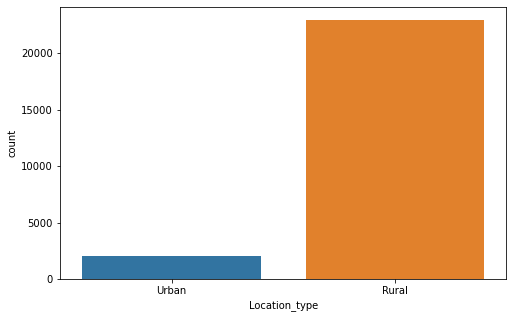

In [46]:
plt.figure(figsize = (8,5))
sns.countplot(df['Location_type']);
df['Location_type'].value_counts(normalize = True)

Large    0.40676
Mid      0.40080
Small    0.19244
Name: WH_capacity_size, dtype: float64

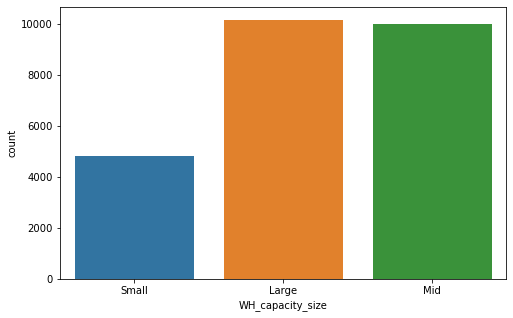

In [47]:
plt.figure(figsize = (8,5))
sns.countplot(df['WH_capacity_size']);
df['WH_capacity_size'].value_counts(normalize = True)

North    0.41112
West     0.31724
South    0.25448
East     0.01716
Name: zone, dtype: float64

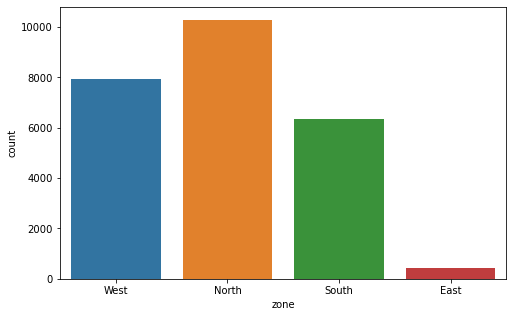

In [48]:
plt.figure(figsize = (8,5))
sns.countplot(df['zone']);
df['zone'].value_counts(normalize = True)

Zone 6    0.33356
Zone 5    0.18348
Zone 4    0.16704
Zone 2    0.11852
Zone 3    0.11524
Zone 1    0.08216
Name: WH_regional_zone, dtype: float64

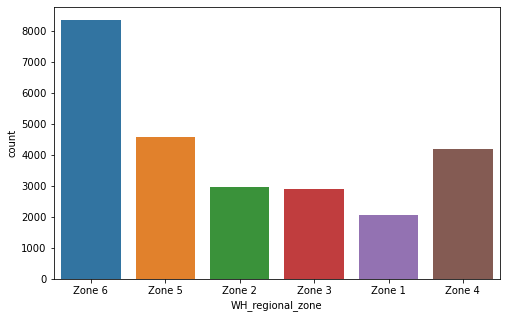

In [49]:
plt.figure(figsize = (8,5))
sns.countplot(df['WH_regional_zone']);
df['WH_regional_zone'].value_counts(normalize = True)

Company Owned    0.54312
Rented           0.45688
Name: wh_owner_type, dtype: float64

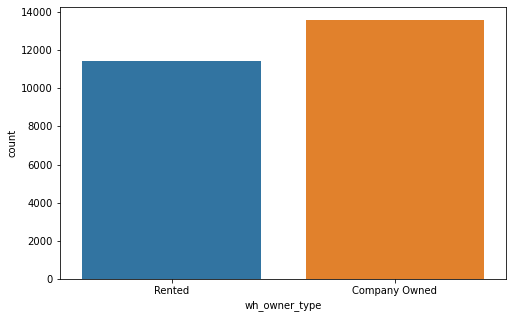

In [50]:
plt.figure(figsize = (8,5))
sns.countplot(df['wh_owner_type']);
df['wh_owner_type'].value_counts(normalize = True)

C     0.228333
B+    0.204093
B     0.199734
A     0.193882
A+    0.173958
Name: approved_wh_govt_certificate, dtype: float64

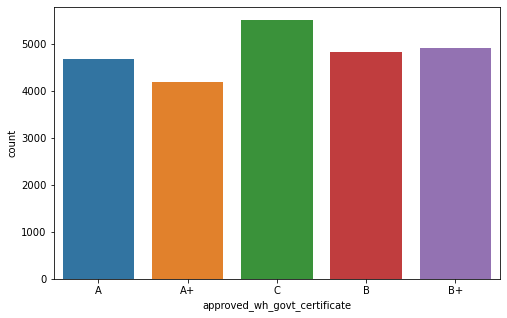

In [51]:
plt.figure(figsize = (8,5))
sns.countplot(df['approved_wh_govt_certificate']);
df['approved_wh_govt_certificate'].value_counts(normalize = True)

In [52]:
# Bivariate Analysis

In [53]:
# graphs made using tableau

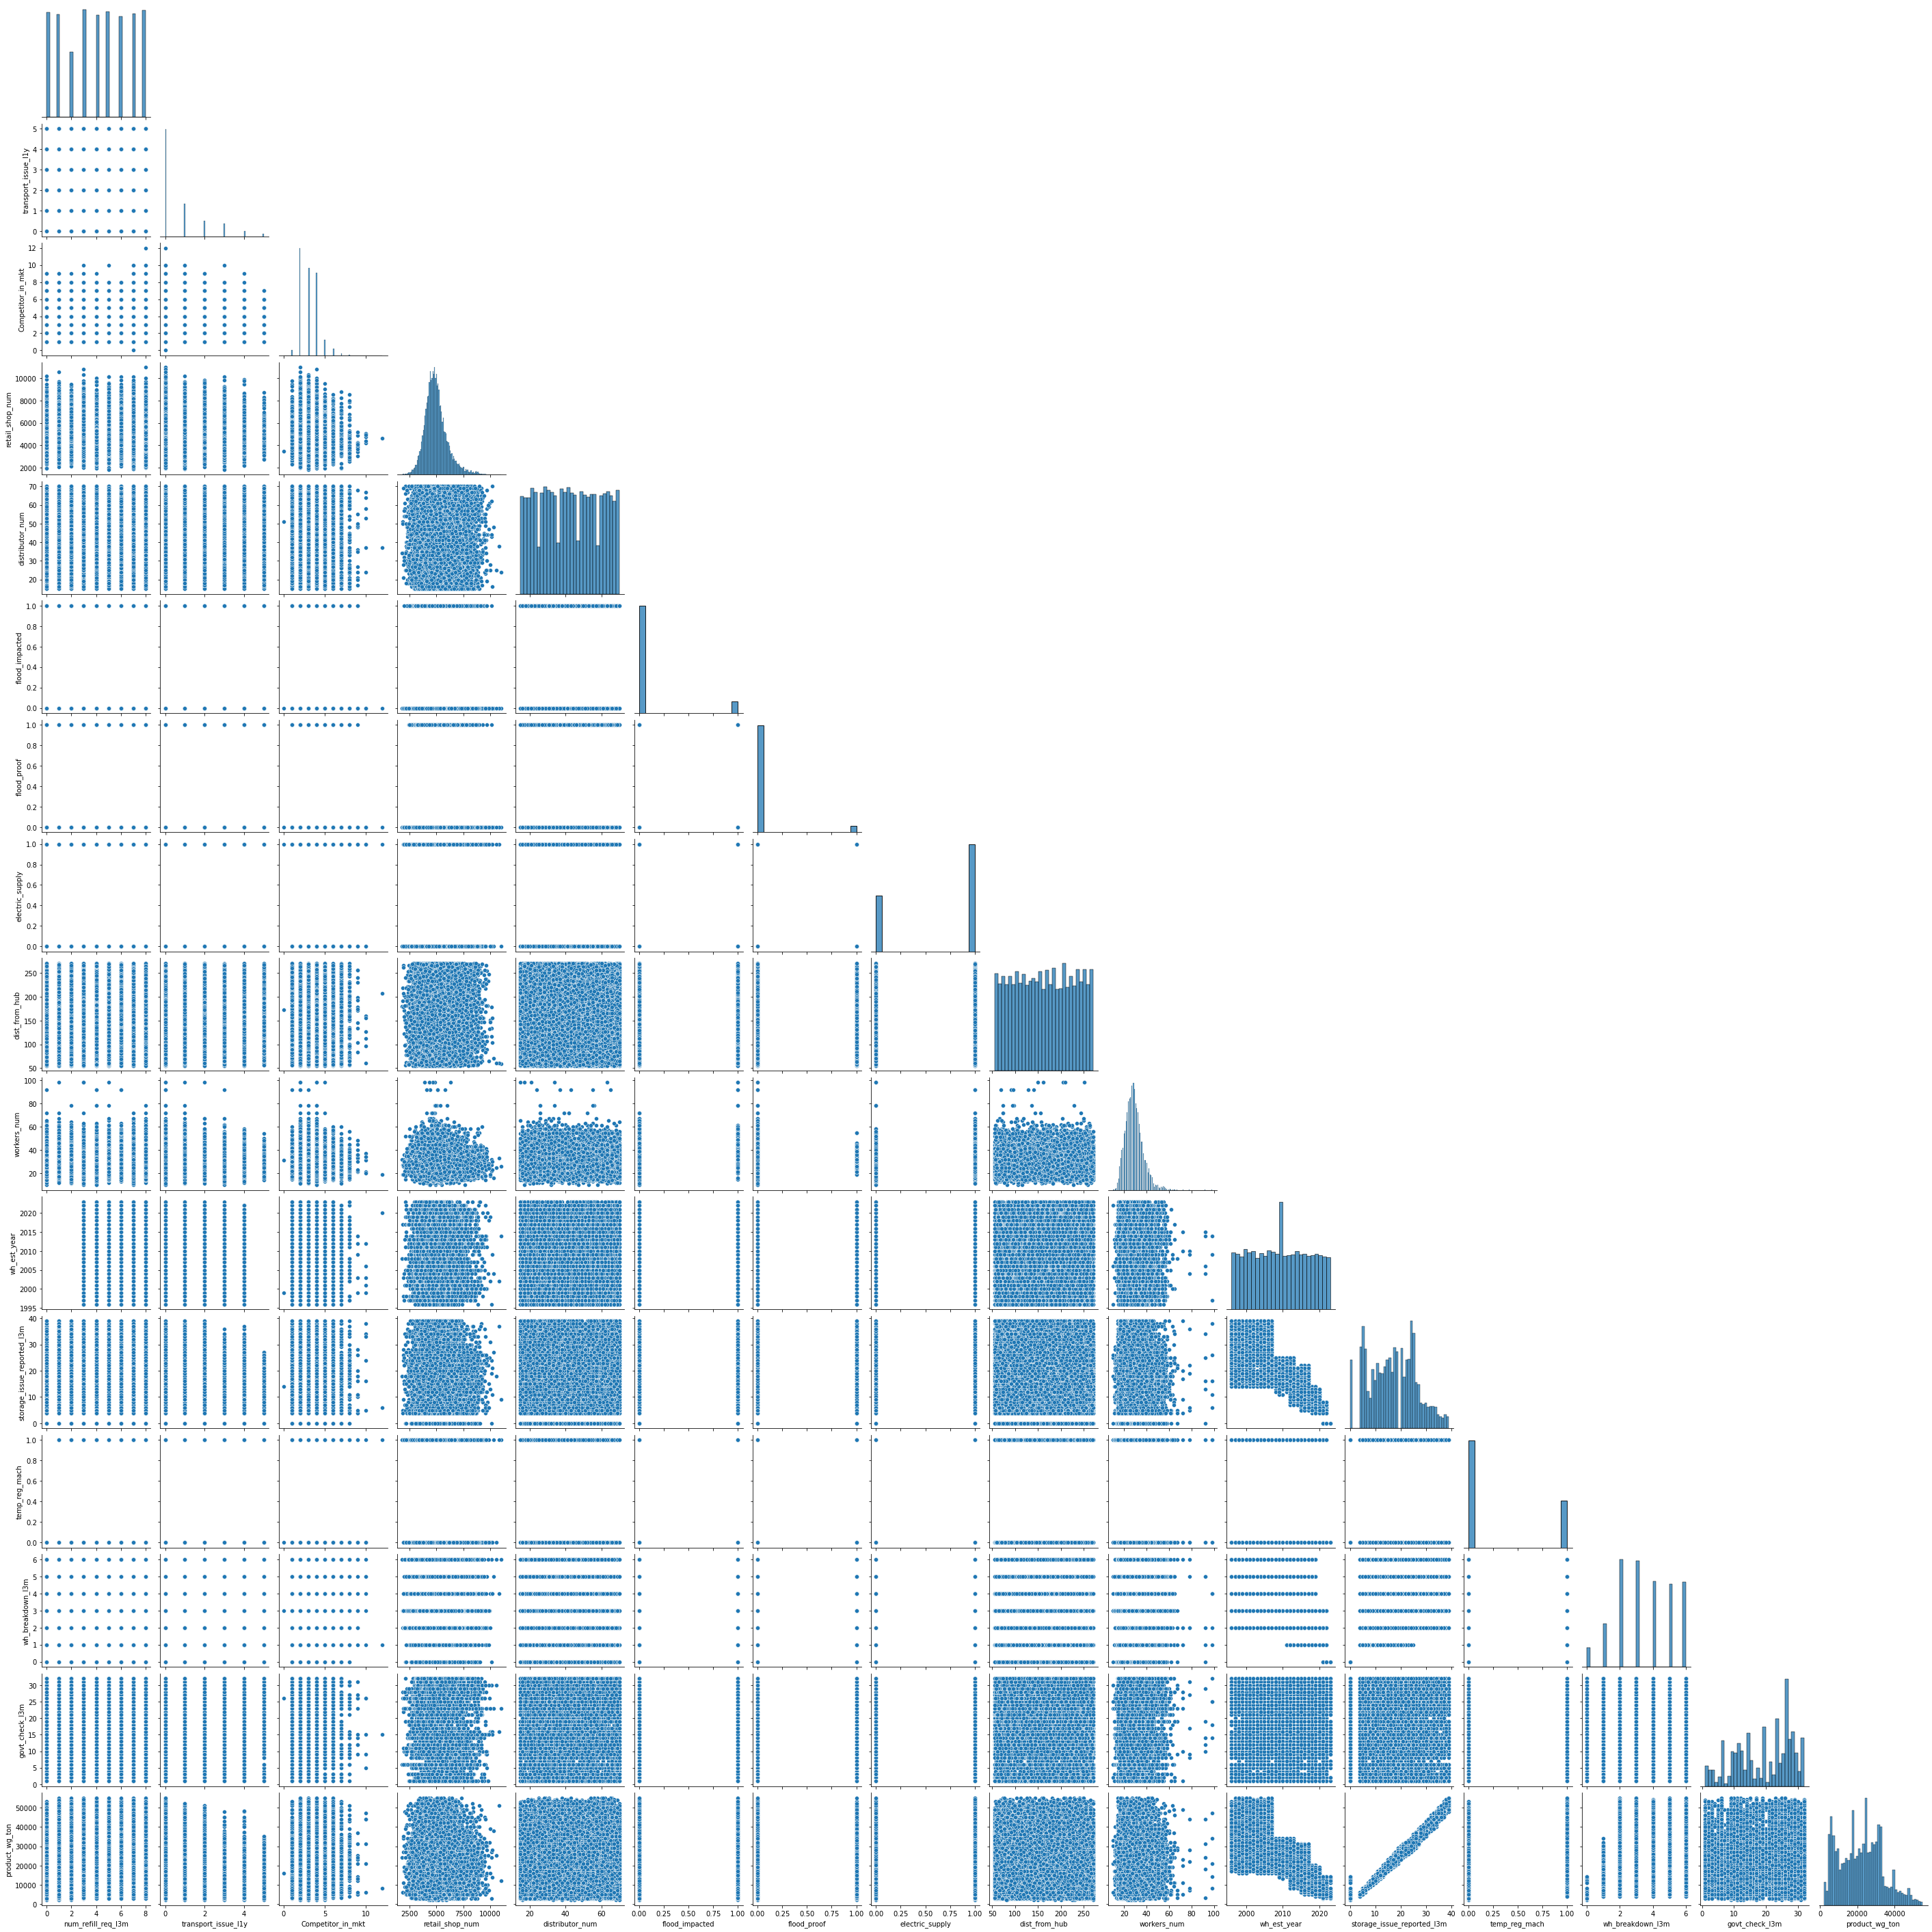

In [54]:
sns.pairplot(df, corner=True);

Text(0.5, 1.0, 'Heat Map')

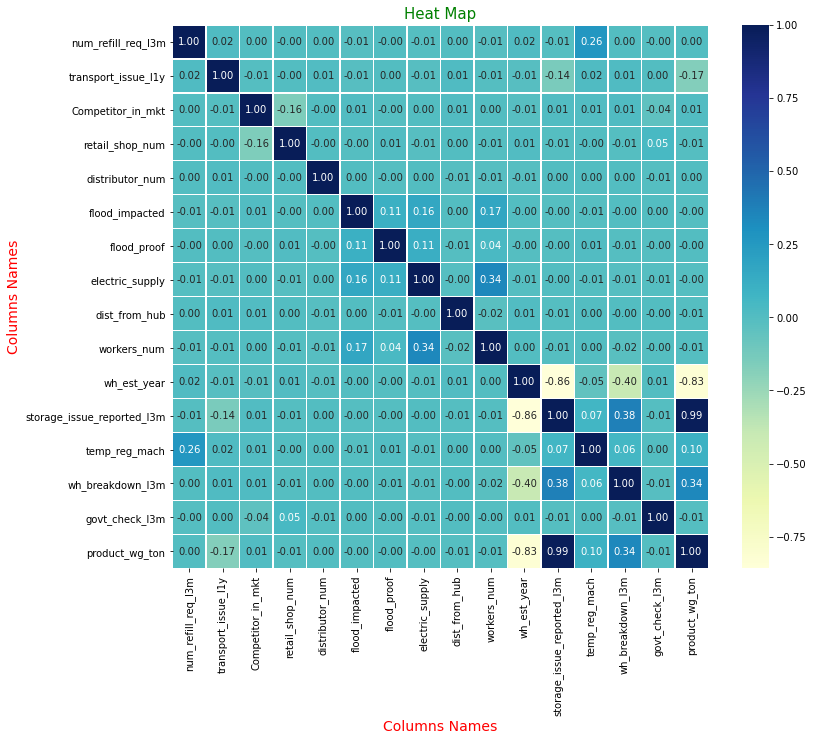

In [55]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap="YlGnBu", linewidths=.5)
plt.xlabel('Columns Names',fontsize=14, color = 'red')
plt.ylabel('Columns Names',fontsize=14, color = 'red')
plt.title('Heat Map',fontsize=15, color = 'green')

In [56]:
### Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) 
# Find out all variables that contain missing values

wh_est_year                     11881
workers_num                       990
approved_wh_govt_certificate      908
dtype: int64

In [57]:
# for wh_est_year  more than 47.5% of data is missing
11881/25000*100

47.524

In [58]:
df.duplicated().sum()

0

In [59]:
# Removing unwanted variables from our dataset
# wh_est_year has more than 47% of data missing in it

df.drop(["wh_est_year"] , axis=1, inplace = True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [61]:
df.isna().sum()

Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     990
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    908
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

In [62]:
# One hot encoding of variables

In [63]:
df = pd.get_dummies(df, columns = ['Location_type','WH_capacity_size','zone','WH_regional_zone','wh_owner_type'], drop_first=True)

In [64]:
df.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented
0,3,1,2,4651,24,0,1,1,91,29.0,...,1,0,0,1,0,0,0,0,1,1
1,0,0,4,6217,47,0,0,1,210,31.0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,...,0,0,1,0,1,0,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,...,0,1,0,0,0,1,0,0,0,1
4,3,1,2,4740,42,1,0,1,112,25.0,...,0,1,0,0,0,0,0,1,0,0


In [65]:
# Label encoding of approved_wh_govt_certificate column

df['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [66]:
df['approved_wh_govt_certificate']=np.where(df['approved_wh_govt_certificate'] =='A+','1',df['approved_wh_govt_certificate'])
df['approved_wh_govt_certificate']=np.where(df['approved_wh_govt_certificate'] =='A','2',df['approved_wh_govt_certificate'])
df['approved_wh_govt_certificate']=np.where(df['approved_wh_govt_certificate'] =='B+','3',df['approved_wh_govt_certificate'])
df['approved_wh_govt_certificate']=np.where(df['approved_wh_govt_certificate'] =='B','4',df['approved_wh_govt_certificate'])
df['approved_wh_govt_certificate']=np.where(df['approved_wh_govt_certificate'] =='C','5',df['approved_wh_govt_certificate']) 

In [67]:
df['approved_wh_govt_certificate'].value_counts()

5    5501
3    4917
4    4812
2    4671
1    4191
Name: approved_wh_govt_certificate, dtype: int64

In [68]:
# Missing value treatment using KNN imputer for the 2 columns

imputer = KNNImputer(n_neighbors=2)

In [69]:
df_new = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [70]:
df_new.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented
0,3.0,1.0,2.0,4651.0,24.0,0.0,1.0,1.0,91.0,29.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,4.0,6217.0,47.0,0.0,0.0,1.0,210.0,31.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,4.0,4306.0,64.0,0.0,0.0,0.0,161.0,37.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7.0,4.0,2.0,6000.0,50.0,0.0,0.0,0.0,103.0,21.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3.0,1.0,2.0,4740.0,42.0,1.0,0.0,1.0,112.0,25.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
df_new.isna().sum()

num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
Location_type_Urban             0
WH_capacity_size_Mid            0
WH_capacity_size_Small          0
zone_North                      0
zone_South                      0
zone_West                       0
WH_regional_zone_Zone 2         0
WH_regional_zone_Zone 3         0
WH_regional_zone_Zone 4         0
WH_regional_zone_Zone 5         0
WH_regional_zone_Zone 6         0
wh_owner_type_Rented            0
dtype: int64

In [72]:
# Outliers treatment of variable that needs it

In [73]:
outliers_col = ['retail_shop_num','workers_num'] 

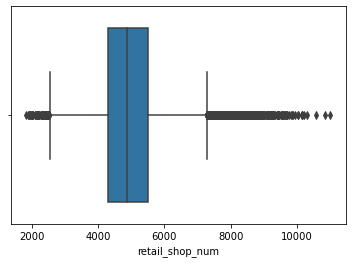

In [74]:
sns.boxplot(df_new['retail_shop_num'])
plt.show()

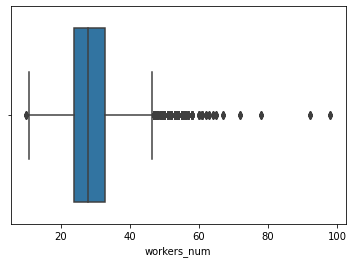

In [75]:
sns.boxplot(df_new['workers_num'])
plt.show()

In [76]:
def detect_outlier(x):   
    Q1,Q3 = x.quantile([0.25,0.75])                  
    IQR = Q3-Q1                  
    lower_range = Q1 - (1.5 * IQR)                  
    upper_range = Q3 + (1.5 * IQR)                   
    return lower_range, upper_range      

In [77]:
# Treating/Capping outliers in each feature                      
                      
for i in outliers_col:
    ll,ul = detect_outlier(df_new[i])                 
    df_new[i] = np.where(df_new[i] > ul, ul, df_new[i])                 
    df_new[i] = np.where(df_new[i] < ll, ll, df_new[i])    

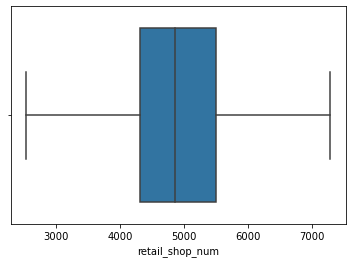

In [78]:
sns.boxplot(df_new['retail_shop_num'])
plt.show()

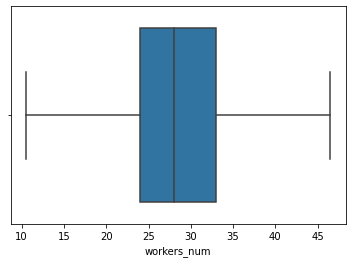

In [79]:
sns.boxplot(df_new['workers_num'])
plt.show()

In [80]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   num_refill_req_l3m            25000 non-null  float64
 1   transport_issue_l1y           25000 non-null  float64
 2   Competitor_in_mkt             25000 non-null  float64
 3   retail_shop_num               25000 non-null  float64
 4   distributor_num               25000 non-null  float64
 5   flood_impacted                25000 non-null  float64
 6   flood_proof                   25000 non-null  float64
 7   electric_supply               25000 non-null  float64
 8   dist_from_hub                 25000 non-null  float64
 9   workers_num                   25000 non-null  float64
 10  storage_issue_reported_l3m    25000 non-null  float64
 11  temp_reg_mach                 25000 non-null  float64
 12  approved_wh_govt_certificate  25000 non-null  float64
 13  w

In [81]:
# Performing K-Means clustering

sc = StandardScaler()

In [82]:
df_scaled = pd.DataFrame(sc.fit_transform(df_new), columns = df_new.columns)

In [83]:
df_scaled.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented
0,-0.417807,0.188690,-0.967205,-0.317618,-1.146546,-0.329915,4.159520,0.722737,-1.156575,0.031880,...,2.048518,-0.835547,-0.584248,1.467034,-0.366682,-0.360902,-0.447815,-0.474036,1.413493,1.090302
1,-1.568750,-0.645043,0.784661,1.297843,0.285226,-0.329915,-0.240412,0.722737,0.740827,0.308954,...,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,-0.360902,-0.447815,2.109546,-0.707467,-0.917177
2,-1.185102,-0.645043,0.784661,-0.673514,1.343493,-0.329915,-0.240412,-1.383630,-0.040456,1.140174,...,-0.488158,-0.835547,1.711602,-0.681648,2.727159,-0.360902,-0.447815,-0.474036,-0.707467,-0.917177
3,1.116783,2.689890,-0.967205,1.073989,0.471979,-0.329915,-0.240412,-1.383630,-0.965240,-1.076414,...,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,2.770838,-0.447815,-0.474036,-0.707467,1.090302
4,-0.417807,0.188690,-0.967205,-0.225807,-0.026028,3.031081,-0.240412,0.722737,-0.821739,-0.522267,...,-0.488158,1.196821,-0.584248,-0.681648,-0.366682,-0.360902,-0.447815,2.109546,-0.707467,-0.917177


In [84]:
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)                             
    KM.fit(df_scaled)                             
    wss.append(KM.inertia_)

In [85]:
wss

[700000.0000000002,
 639258.8555397736,
 604078.1367630623,
 573775.0114779976,
 544420.3509802816,
 522509.2770048006,
 506584.8941989168,
 499126.36051451095,
 489121.85841830826,
 485561.64622543973]

Text(0.5, 1.0, 'Elbow Curve')

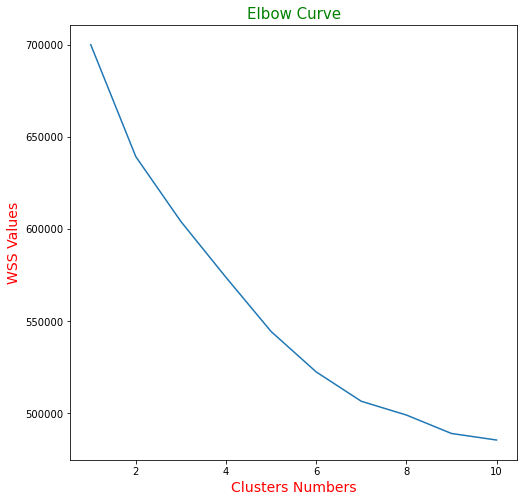

In [86]:
plt.figure(figsize = (8,8))
plt.plot(range(1,11),wss);
plt.xlabel('Clusters Numbers',fontsize=14, color = 'red')
plt.ylabel('WSS Values',fontsize=14, color = 'red')
plt.title('Elbow Curve',fontsize=15, color = 'green')

In [87]:
# Checking of 6 clusters
k_final = KMeans(n_clusters=6)
k_final.fit(df_scaled)

KMeans(n_clusters=6)

In [88]:
labels_final = k_final.labels_

In [89]:
k_final.inertia_

522509.2770048006

In [90]:
round(silhouette_score(df_scaled,labels_final),3)

0.126

In [91]:
round(silhouette_samples(df_scaled,labels_final).min(),3)

0.017

In [92]:
df_scaled['Clust_kmeans'] = labels_final

In [93]:
df_scaled.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,Clust_kmeans
0,-0.417807,0.188690,-0.967205,-0.317618,-1.146546,-0.329915,4.159520,0.722737,-1.156575,0.031880,...,-0.835547,-0.584248,1.467034,-0.366682,-0.360902,-0.447815,-0.474036,1.413493,1.090302,0
1,-1.568750,-0.645043,0.784661,1.297843,0.285226,-0.329915,-0.240412,0.722737,0.740827,0.308954,...,1.196821,-0.584248,-0.681648,-0.366682,-0.360902,-0.447815,2.109546,-0.707467,-0.917177,3
2,-1.185102,-0.645043,0.784661,-0.673514,1.343493,-0.329915,-0.240412,-1.383630,-0.040456,1.140174,...,-0.835547,1.711602,-0.681648,2.727159,-0.360902,-0.447815,-0.474036,-0.707467,-0.917177,5
3,1.116783,2.689890,-0.967205,1.073989,0.471979,-0.329915,-0.240412,-1.383630,-0.965240,-1.076414,...,1.196821,-0.584248,-0.681648,-0.366682,2.770838,-0.447815,-0.474036,-0.707467,1.090302,1
4,-0.417807,0.188690,-0.967205,-0.225807,-0.026028,3.031081,-0.240412,0.722737,-0.821739,-0.522267,...,1.196821,-0.584248,-0.681648,-0.366682,-0.360902,-0.447815,2.109546,-0.707467,-0.917177,3


In [94]:
df_scaled['Clust_kmeans'].value_counts().sort_index()

0    4811
1    2881
2    4176
3    4587
4    5582
5    2963
Name: Clust_kmeans, dtype: int64

In [95]:
aggdata_kmean = df_scaled.groupby('Clust_kmeans').mean()
aggdata_kmean['Freq'] = df_scaled['Clust_kmeans'].value_counts().sort_index()
aggdata_kmean

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,Freq
Clust_kmeans,,,,,,,,,,,,,,,,,,,,,
0,-0.023395,0.019206,0.021246,0.149483,-0.005765,0.017292,-0.010859,-0.005801,-0.005866,0.018288,...,-0.080643,0.148744,-0.062188,-0.366682,-0.360902,-0.447815,-0.474036,0.507974,0.001648,4811
1,0.016176,0.011584,0.054362,-0.154223,0.005929,-0.023098,0.023797,0.023783,-0.008346,0.009159,...,-0.157621,0.121003,0.006736,-0.366682,2.770838,-0.447815,-0.474036,-0.707467,-0.012035,2881
2,0.014531,0.016993,0.118901,0.042107,0.004933,0.020188,0.015618,-0.023773,0.018694,-0.026043,...,-0.258347,-0.099349,0.329920,-0.366682,-0.360902,2.233067,-0.474036,-0.707467,-0.010543,4176
3,-0.002127,-0.009064,-0.050980,-0.062531,0.009610,-0.014112,0.001311,0.015104,0.007339,0.005317,...,0.013821,-0.030181,0.015842,-0.366682,-0.360902,-0.447815,2.109546,-0.707467,-0.006875,4587
4,0.005085,-0.012798,0.011982,-0.050236,-0.008642,-0.001162,-0.007095,0.013696,-0.004968,0.010114,...,0.465358,-0.375310,-0.103867,-0.366682,-0.360902,-0.447815,-0.474036,1.413493,0.008522,5582
5,-0.004509,-0.028255,-0.198584,0.039340,-0.001952,-0.010037,-0.016184,-0.029385,-0.010709,-0.029183,...,-0.249775,0.534621,-0.199409,2.727159,-0.360902,-0.447815,-0.474036,-0.707467,0.018472,2963


In [96]:
# Model Building

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [97]:
x = df_new.drop('product_wg_ton', axis = 1)
y = df_new.pop('product_wg_ton')

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 123)

In [99]:
# Model 1st - Linear Regression Model

rm = LinearRegression()

In [100]:
# Best fit model for training dataset

rm.fit(x_train, y_train)

LinearRegression()

In [101]:
# Let us explore the coefficients for each of the independent attributes

d1 = pd.DataFrame({"Feature":x_train.columns,"Coefficients":rm.coef_})
d1

,Feature,Coefficients
0,num_refill_req_l3m,0.767011
1,transport_issue_l1y,-290.213702
2,Competitor_in_mkt,-15.886533
3,retail_shop_num,-0.003594
4,distributor_num,0.761183
5,flood_impacted,16.860495
6,flood_proof,82.503517
7,electric_supply,-13.682336
8,dist_from_hub,0.159560
9,workers_num,-0.475955


In [102]:
# R square on training data
r1_train = rm.score(x_train, y_train)
# R square on testing data
r1_test = rm.score(x_test, y_test)
print('Accuracy/R2 Score of model on train:',r1_train)
print('Accuracy/R2 Score of model on test:',r1_test)

Accuracy/R2 Score of model on train: 0.9781522166089247
Accuracy/R2 Score of model on test: 0.9767450262337053


In [103]:
#RMSE on Training data
pred_rm_train = rm.predict(x_train)
adj1_train = 1 - ( 1-metrics.r2_score(y_train,pred_rm_train) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
mse1_train = metrics.mean_squared_error(y_train,pred_rm_train)
rmse1_train = np.sqrt(metrics.mean_squared_error(y_train,pred_rm_train))
mape1_train = mean_absolute_percentage_error(y_train,pred_rm_train)
print('Adjusted R2 of train:',adj1_train,'\nMSE of train:',mse1_train,'\nRMSE of train:',rmse1_train,'\nMAPE of train:',mape1_train)

Adjusted R2 of train: 0.9781285945461521 
MSE of train: 2947336.608418192 
RMSE of train: 1716.7808853835108 
MAPE of train: 8.65150346391435


In [104]:
#RMSE on Testing data
pred_rm_test=rm.predict(x_test)
adj1_test = 1 - ( 1-metrics.r2_score(y_test,pred_rm_test) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
mse1_test = metrics.mean_squared_error(y_test,pred_rm_test)
rmse1_test = np.sqrt(metrics.mean_squared_error(y_test,pred_rm_test))
mape1_test = mean_absolute_percentage_error(y_test,pred_rm_test)
print('Adjusted R2 of test:',adj1_test,'\nMSE of test:',mse1_test,'\nRMSE of test:',rmse1_test,'\nMAPE of test:',mape1_test)

Adjusted R2 of test: 0.9767198827012814 
MSE of test: 3124096.8709620414 
RMSE of test: 1767.5114910410177 
MAPE of test: 8.875039223449589


In [105]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])]

In [106]:
vif_df = pd.DataFrame({"Column_Names": x.columns, "VIF_Value": vif})
vif_df.sort_values(by = "VIF_Value").reset_index(drop = True)

,Column_Names,VIF_Value
0,flood_proof,1.081301
1,Location_type_Urban,1.097796
2,flood_impacted,1.167176
3,transport_issue_l1y,1.452368
4,temp_reg_mach,1.677081
5,wh_owner_type_Rented,1.959403
6,WH_capacity_size_Small,2.802146
7,electric_supply,3.502089
8,num_refill_req_l3m,3.705599
9,WH_regional_zone_Zone 5,5.409670


In [107]:
# Model 2nd - Decision Tree Regressor Model

dtr_temp = DecisionTreeRegressor(random_state = 123)

In [108]:
grid_dtr = {'criterion' : ['squared_error','absolute_error','poisson'],
            'max_depth': [7,8,9,10],
            'min_samples_leaf': [7,8,9,10,11],
            'min_samples_split': [1,2,3],
            'max_features': ['auto']}

In [109]:
grid_search_dtr = GridSearchCV(estimator = dtr_temp, param_grid = grid_dtr, cv = 3, n_jobs = -1)

In [110]:
grid_search_dtr.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=123), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [7, 8, 9, 10], 'max_features': ['auto'],
                         'min_samples_leaf': [7, 8, 9, 10, 11],
                         'min_samples_split': [1, 2, 3]})

In [111]:
grid_search_dtr.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 11,
 'min_samples_split': 2}

In [112]:
dtr = grid_search_dtr.best_estimator_
dtr

DecisionTreeRegressor(max_depth=9, max_features='auto', min_samples_leaf=11,
                      random_state=123)

In [113]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto', min_samples_leaf=11,
                      random_state=123)

In [114]:
# R square on training data
r2_train = dtr.score(x_train, y_train)
# R square on testing data
r2_test = dtr.score(x_test, y_test)
print('Accuracy/R2 Score of model on train:',r2_train)
print('Accuracy/R2 Score of model on test:',r2_test)

Accuracy/R2 Score of model on train: 0.9942586918966944
Accuracy/R2 Score of model on test: 0.9931609647442345


In [115]:
#RMSE on Training data
pred_dtr_train = dtr.predict(x_train)
adj2_train = 1 - ( 1-metrics.r2_score(y_train,pred_dtr_train) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
mse2_train = metrics.mean_squared_error(y_train,pred_dtr_train)
rmse2_train = np.sqrt(metrics.mean_squared_error(y_train,pred_dtr_train))
mape2_train = mean_absolute_percentage_error(y_train,pred_dtr_train)
print('Adjusted R2 of train:',adj2_train,'\nMSE of train:',mse2_train,'\nRMSE of train:',rmse2_train,'\nMAPE of train:',mape2_train)

Adjusted R2 of train: 0.9942524843314697 
MSE of train: 774521.0234917088 
RMSE of train: 880.068760661182 
MAPE of train: 4.091575942558149


In [116]:
#RMSE on Testing data
pred_dtr_test = dtr.predict(x_test)
adj2_test = 1 - ( 1-metrics.r2_score(y_test,pred_dtr_test) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
mse2_test = metrics.mean_squared_error(y_test,pred_dtr_test)
rmse2_test = np.sqrt(metrics.mean_squared_error(y_test,pred_dtr_test))
mape2_test = mean_absolute_percentage_error(y_test,pred_dtr_test)
print('Adjusted R2 of test:',adj2_test,'\nMSE of test:',mse2_test,'\nRMSE of test:',rmse2_test,'\nMAPE of test:',mape2_test)

Adjusted R2 of test: 0.9931535703043857 
MSE of test: 918762.9647599525 
RMSE of test: 958.5212385544478 
MAPE of test: 4.445216533405588


In [117]:
pd.DataFrame(dtr.feature_importances_, columns = ['Imp_dtr'], index = x_train.columns).sort_values('Imp_dtr', ascending ='True')

,Imp_dtr
WH_regional_zone_Zone 4,0.000000e+00
WH_regional_zone_Zone 5,0.000000e+00
Location_type_Urban,0.000000e+00
flood_impacted,0.000000e+00
flood_proof,0.000000e+00
WH_regional_zone_Zone 2,0.000000e+00
WH_regional_zone_Zone 3,0.000000e+00
zone_North,7.793740e-07
WH_regional_zone_Zone 6,8.440317e-07
WH_capacity_size_Small,2.878788e-06


In [118]:
# Model 3rd - Random Forest Regressor Model

rfr = RandomForestRegressor(random_state = 123)

In [119]:
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=123)

In [120]:
# R square on training data
r3_train = rfr.score(x_train, y_train)
# R square on testing data
r3_test = rfr.score(x_test, y_test)
print('Accuracy/R2 Score of model on train:',r3_train)
print('Accuracy/R2 Score of model on test:',r3_test)

Accuracy/R2 Score of model on train: 0.9990657573858297
Accuracy/R2 Score of model on test: 0.9932510878304263


In [121]:
#RMSE on Training data
pred_rfr_train = rfr.predict(x_train)
adj3_train = 1 - ( 1-metrics.r2_score(y_train,pred_rfr_train) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
mse3_train = metrics.mean_squared_error(y_train,pred_rfr_train)
rmse3_train = np.sqrt(metrics.mean_squared_error(y_train,pred_rfr_train))
mape3_train = mean_absolute_percentage_error(y_train,pred_rfr_train)
print('Adjusted R2 of train:',adj3_train,'\nMSE of train:',mse3_train,'\nRMSE of train:',rmse3_train,'\nMAPE of train:',mape3_train)

Adjusted R2 of train: 0.9990647472724794 
MSE of train: 126032.34884749715 
RMSE of train: 355.010350338546 
MAPE of train: 1.6289098876865336


In [122]:
#RMSE on Testing data
pred_rfr_test = rfr.predict(x_test)
adj3_test = 1 - ( 1-metrics.r2_score(y_test,pred_rfr_test) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
mse3_test = metrics.mean_squared_error(y_test,pred_rfr_test)
rmse3_test = np.sqrt(metrics.mean_squared_error(y_test,pred_rfr_test))
mape3_test = mean_absolute_percentage_error(y_test,pred_rfr_test)
print('Adjusted R2 of test:',adj3_test,'\nMSE of test:',mse3_test,'\nRMSE of test:',rmse3_test,'\nMAPE of test:',mape3_test)

Adjusted R2 of test: 0.9932437908326456 
MSE of test: 906655.7375318133 
RMSE of test: 952.1847181780504 
MAPE of test: 4.408306846103922


In [123]:
pd.DataFrame(rfr.feature_importances_, columns = ['Imp_rfr'], index = x_train.columns).sort_values('Imp_rfr', ascending ='True')

,Imp_rfr
WH_regional_zone_Zone 2,0.000046
flood_proof,0.000049
Location_type_Urban,0.000055
WH_regional_zone_Zone 3,0.000059
WH_capacity_size_Mid,0.000065
WH_capacity_size_Small,0.000067
WH_regional_zone_Zone 4,0.000068
WH_regional_zone_Zone 6,0.000075
WH_regional_zone_Zone 5,0.000075
zone_South,0.000079


In [124]:
# Model 4th - Bagging Regressor Model

In [125]:
dtree = DecisionTreeRegressor(random_state = 123)

In [126]:
bgr = BaggingRegressor(base_estimator = dtree, n_estimators = 10, random_state = 123)

In [127]:
bgr.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [128]:
# R square on training data
r4_train = bgr.score(x_train, y_train)
# R square on testing data
r4_test = bgr.score(x_test, y_test)
print('Accuracy/R2 Score of model on train:',r4_train)
print('Accuracy/R2 Score of model on test:',r4_test)

Accuracy/R2 Score of model on train: 0.9986974384877386
Accuracy/R2 Score of model on test: 0.9925907156414113


In [129]:
#RMSE on Training data
pred_bgr_train = bgr.predict(x_train)
adj4_train = 1 - ( 1-metrics.r2_score(y_train,pred_bgr_train) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
mse4_train = metrics.mean_squared_error(y_train,pred_bgr_train)
rmse4_train = np.sqrt(metrics.mean_squared_error(y_train,pred_bgr_train))
mape4_train = mean_absolute_percentage_error(y_train,pred_bgr_train)
print('Adjusted R2 of train:',adj4_train,'\nMSE of train:',mse4_train,'\nRMSE of train:',rmse4_train,'\nMAPE of train:',mape4_train)

Adjusted R2 of train: 0.9986960301439604 
MSE of train: 175719.758892 
RMSE of train: 419.18940694153997 
MAPE of train: 1.7612371093156423


In [130]:
#RMSE on Testing data
pred_bgr_test = bgr.predict(x_test)
adj4_test = 1 - ( 1-metrics.r2_score(y_test,pred_bgr_test) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
mse4_test = metrics.mean_squared_error(y_test,pred_bgr_test)
rmse4_test = np.sqrt(metrics.mean_squared_error(y_test,pred_bgr_test))
mape4_test = mean_absolute_percentage_error(y_test,pred_bgr_test)
print('Adjusted R2 of test:',adj4_test,'\nMSE of test:',mse4_test,'\nRMSE of test:',rmse4_test,'\nMAPE of test:',mape4_test)

Adjusted R2 of test: 0.9925827046419847 
MSE of test: 995370.8102773334 
RMSE of test: 997.6827202459374 
MAPE of test: 4.611458685219493


In [131]:
# Model 5th - Gradient Boost Regressor Model

In [132]:
gbr = GradientBoostingRegressor(random_state = 123)

In [133]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=123)

In [134]:
# R square on training data
r5_train = gbr.score(x_train, y_train)
# R square on testing data
r5_test = gbr.score(x_test, y_test)
print('Accuracy/R2 Score of model on train:',r5_train)
print('Accuracy/R2 Score of model on test:',r5_test)

Accuracy/R2 Score of model on train: 0.9938886434338771
Accuracy/R2 Score of model on test: 0.9935650488936533


In [135]:
#RMSE on Training data
pred_gbr_train = gbr.predict(x_train)
adj5_train = 1 - ( 1-metrics.r2_score(y_train,pred_gbr_train) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
mse5_train = metrics.mean_squared_error(y_train,pred_gbr_train)
rmse5_train = np.sqrt(metrics.mean_squared_error(y_train,pred_gbr_train))
mape5_train = mean_absolute_percentage_error(y_train,pred_gbr_train)
print('Adjusted R2 of train:',adj5_train,'\nMSE of train:',mse5_train,'\nRMSE of train:',rmse5_train,'\nMAPE of train:',mape5_train)

Adjusted R2 of train: 0.9938820357682001 
MSE of train: 824441.7574090795 
RMSE of train: 907.9877517946371 
MAPE of train: 4.399751710200134


In [136]:
#RMSE on Testing data
pred_gbr_test = gbr.predict(x_test)
adj5_test = 1 - ( 1-metrics.r2_score(y_test,pred_gbr_test) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
mse5_test = metrics.mean_squared_error(y_test,pred_gbr_test)
rmse5_test = np.sqrt(metrics.mean_squared_error(y_test,pred_gbr_test))
mape5_test = mean_absolute_percentage_error(y_test,pred_gbr_test)
print('Adjusted R2 of test:',adj5_test,'\nMSE of test:',mse5_test,'\nRMSE of test:',rmse5_test,'\nMAPE of test:',mape5_test)

Adjusted R2 of test: 0.9935580913540141 
MSE of test: 864477.8883934487 
RMSE of test: 929.7730305797478 
MAPE of test: 4.491780118224368


In [137]:
pd.DataFrame(gbr.feature_importances_, columns = ['Imp_gbr'], index = x_train.columns).sort_values('Imp_gbr', ascending ='True')

,Imp_gbr
wh_owner_type_Rented,0.000000e+00
zone_North,0.000000e+00
WH_capacity_size_Small,0.000000e+00
WH_capacity_size_Mid,0.000000e+00
Location_type_Urban,0.000000e+00
WH_regional_zone_Zone 6,0.000000e+00
electric_supply,0.000000e+00
WH_regional_zone_Zone 4,0.000000e+00
zone_West,0.000000e+00
Competitor_in_mkt,4.641539e-07


In [138]:
# Visualising our best model Random Forest Predictions Vs Actual Values

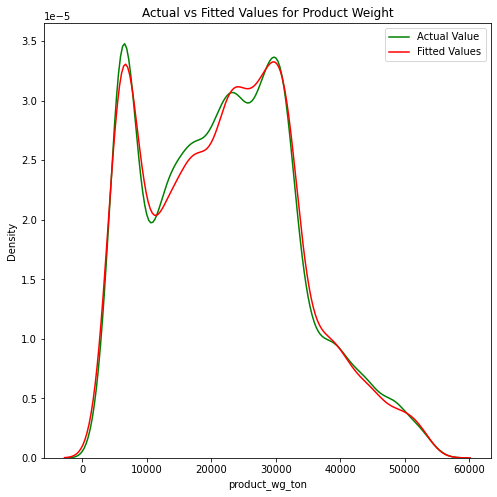

In [139]:
plt.figure(figsize=(8, 8))
ax = sns.distplot(y, hist=False, color="g", label="Actual Value")
sns.distplot(pred_rfr_test, hist=False, color="r", label="Fitted Values",ax=ax)
ax.legend()
plt.title('Actual vs Fitted Values for Product Weight')
plt.show()

In [140]:
# END